A program that reads and processes images for a Gradient Boosting Classifier to classify as images as good, blacked-out, saturated, or blurry.

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import sys
sys.path.insert(0, 'C:/Users/micha/github/uav-image-analysis/scripts/')
import fit_models

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images2.csv')

paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest2/*MEDIA/'

train_images, image_list = fit_models.read_images(paths)

y = np.array(df_train['Label'])

y = df_train['Label'].values

X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)

print(df_train.head())
print(X_train.shape)
print(y_train)

(324, 327680)
      MEDIA Image_Name  Label
0  100MEDIA   DJI_0001      2
1  100MEDIA   DJI_0002      2
2  100MEDIA   DJI_0003      2
3  100MEDIA   DJI_0004      2
4  100MEDIA   DJI_0005      2
(194, 327680)
[0 0 0 0 0 0 0 3 3 0 0 0 0 3 1 0 0 0 3 3 0 0 0 0 0 3 2 2 0 0 0 1 2 0 0 1 0
 0 0 0 0 0 0 0 0 0 3 0 3 0 3 3 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 2 0 0 2 0 0
 1 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 2 0 2 0 0 2 2 0 0
 1 0 3 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 0 1
 2 2 0 0 0 0 0 0 0 0 1 3 2 0 0 0 0 3 1 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0
 0 0 1 0 0 0 0 2 0]


In [3]:
# Run gradient boosting classifier
model = GradientBoostingClassifier()
model_boosting, probabilities, y_pred = fit_models.supervised_models(model, X_train, y_train, X_test, y_test)
print(probabilities)

             precision    recall  f1-score   support

          0       0.82      0.86      0.84        97
          1       0.40      0.50      0.44         4
          2       0.50      0.73      0.59        11
          3       0.25      0.11      0.15        18

avg / total       0.70      0.73      0.71       130

[2.41059194e-05 7.38644585e-05 3.79236065e-04 2.00982157e-05
 2.54031604e-05 1.72071464e-01 2.20074231e-05 4.54275289e-05
 1.58788902e-02 3.74740438e-04 3.68827722e-05 4.59249932e-05
 1.02625656e-04 2.00982157e-05 2.20828396e-05 4.94142346e-04
 9.98999793e-01 2.00982157e-05 2.18414800e-01 2.26423924e-05
 2.86931820e-03 7.19222093e-01 2.18741113e-05 2.67907840e-05
 2.00976019e-05 2.00944983e-05 2.26138153e-05 2.99108292e-05
 2.00892334e-05 9.99674959e-01 1.58386969e-02 2.00982157e-05
 1.61469359e-01 3.13455118e-04 2.49149957e-05 1.56156812e-03
 7.80811264e-05 1.52075741e-05 2.68641597e-05 1.81903831e-02
 1.50388055e-04 2.92815354e-05 5.81191702e-07 2.26378442e-04
 2.00982

In [4]:
print(confusion_matrix(y_test, y_pred))

[[83  3  7  4]
 [ 0  2  0  2]
 [ 3  0  8  0]
 [15  0  1  2]]


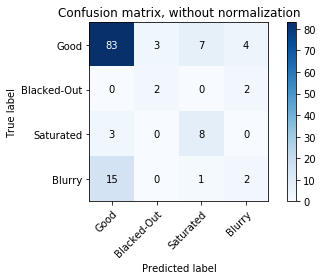

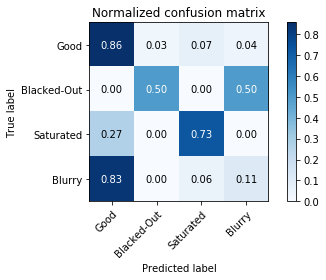

In [5]:
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [6]:
# save the model to disk
#filename = 'finalized_model.sav'
#pickle.dump(model_boosting, open(filename, 'wb'))